In [28]:
import pickle as pkl
from pprint import pprint
import tick
import numpy as np
from matplotlib import pyplot as plt

In [29]:
#  load train data

with open('./data/data_hawkesinhib/train.pkl', 'rb') as f:
    data = pkl.load(f,encoding='latin1')

In [51]:
# describe data
"""
    Event description format:
          'idx_event': event number in the sequence,
          'time_since_last_event': time elapsed from occurrence of previous event,
          'time_since_last_same_event': time elapsed from occurrence of previous event with same type,
          'time_since_start': time elapsed from sequence beginning,
          'type_event': event type,
"""

sequences = len(data['train'])  # count of event sequences
avg_samples_count = sum([len(item) for item in data['train']])//sequences #  average lengh of event sequence
event_types = set([item['type_event'] for sequence in data['train'] for item in sequence ])  #  event type markers
n_types = len(event_types) #  amount of event classes
print(f'Train sequences: {sequences}\nAvr count of events in sequence: {avg_samples_count}\n')
print(f'Amount of event types: {n_types},\nEvent type markers: {event_types}\n')
print('Data example:')
pprint(data['train'][0][0:3])


Train sequences: 8000
Avr count of events in sequence: 60

Amount of event types: 5,
Event type markers: {0, 1, 2, 3, 4}

Data example:
[{'idx_event': 1,
  'time_since_last_event': 0.5548047,
  'time_since_last_same_event': 0.5548047,
  'time_since_start': 0.5548047,
  'type_event': 0},
 {'idx_event': 2,
  'time_since_last_event': 1.1679047,
  'time_since_last_same_event': 1.7227094,
  'time_since_start': 1.7227094,
  'type_event': 1},
 {'idx_event': 3,
  'time_since_last_event': 0.11215174,
  'time_since_last_same_event': 1.2800565,
  'time_since_start': 1.8348612,
  'type_event': 0}]


In [68]:
# data transform
def data_preprocessing(data, n_types):
    data_processed = []
    for sequence in data:
        updated_sequence = [[] for _ in range(n_types)]
        for item in sequence:
            updated_sequence[item['type_event']].append(item['time_since_start'])
        updated_sequence = [np.array(item, dtype=np.double) for item in updated_sequence]
        data_processed.append(updated_sequence)
    return data_processed


In [123]:
from tick.plot import plot_hawkes_kernel_norms
def model_stats(model, test_data):
    plot_hawkes_kernel_norms(model,
                         node_names=list())
    print(f'log-likelihood: {model.score(test_data)}')
    pprint(model.adjacency)

In [146]:
with open('./data/data_hawkesinhib/test.pkl', 'rb') as f:
    data_test = pkl.load(f,encoding='latin1')
    
test_events = data_preprocessing(data_test['test'], n_types)
processed_train = data_preprocessing(data['train'], n_types)





In [179]:
from tick.hawkes import HawkesADM4
decay = .3
estimator_adm4 = HawkesADM4(decay,n_threads=6)
estimator_adm4.fit(processed)

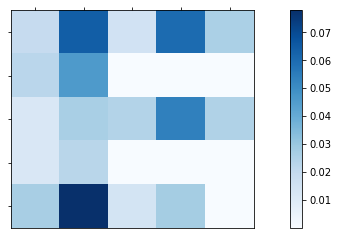

log-likelihood: 0.16072933074245296
array([[1.97538205e-02, 6.39549957e-02, 1.50581042e-02, 6.01728791e-02,
        2.59238907e-02],
       [2.23247397e-02, 4.57159178e-02, 1.81898940e-11, 7.27595761e-11,
        2.54658516e-10],
       [1.19649826e-02, 2.67436637e-02, 2.41869661e-02, 5.38545465e-02,
        2.48133975e-02],
       [1.18746752e-02, 2.26333835e-02, 1.79627204e-05, 2.18278728e-10,
        1.70985004e-09],
       [2.70309337e-02, 7.78330931e-02, 1.41084944e-02, 2.75815393e-02,
        2.54658516e-10]])


In [154]:
model_stats(estimator_adm4, test_events)

In [177]:
from tick.hawkes import HawkesExpKern, HawkesSumExpKern, HawkesSumGaussians

decays_exp_kern = np.random.random([n_types, n_types])
decays_sum_exp_kern =  [5]

In [156]:
estimator_exp_kern = HawkesExpKern(decays_exp_kern)
estimator_exp_kern.fit(processed)

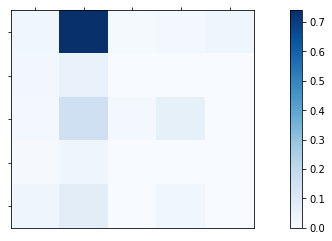

log-likelihood: 0.8409117073081862
array([[0.02928845, 0.73946374, 0.01277364, 0.01715411, 0.03410111],
       [0.02187574, 0.05469463, 0.        , 0.        , 0.        ],
       [0.01675024, 0.15328036, 0.02009289, 0.06547992, 0.        ],
       [0.00873378, 0.03345819, 0.        , 0.        , 0.        ],
       [0.03189352, 0.07865601, 0.        , 0.02826018, 0.        ]])


In [164]:
model_stats(estimator_exp_kern, test_events)

In [195]:
estimator_sum_exp_kern = HawkesSumExpKern([11.97332586, 28.21542404, 11.400408  ])
estimator_sum_exp_kern.fit(processed)

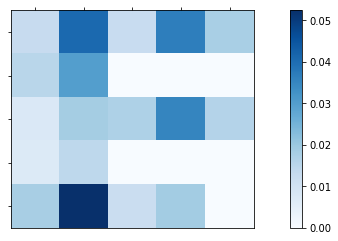

log-likelihood: 0.8517828234802648
array([[[0.        , 0.        , 0.01303192],
        [0.        , 0.01876643, 0.0220005 ],
        [0.        , 0.00441967, 0.00814505],
        [0.00371563, 0.        , 0.03314966],
        [0.00259893, 0.00357515, 0.01184948]],

       [[0.00550578, 0.00419502, 0.00563906],
        [0.00033015, 0.01159387, 0.01799949],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00206546, 0.00336946, 0.00217253],
        [0.00097136, 0.00340059, 0.01413329],
        [0.        , 0.00832002, 0.00884907],
        [0.0076824 , 0.        , 0.02770168],
        [0.00771823, 0.        , 0.00835858]],

       [[0.00238317, 0.00163164, 0.00302604],
        [0.00083924, 0.0014652 , 0.01220481],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00435069, 0.00359489, 0.01

In [196]:
model_stats(estimator_sum_exp_kern, test_events)

In [197]:
from scipy.optimize import basinhopping

def optimise_decays_sum_exp_kern(decays):
    est = HawkesSumExpKern(decays)
    est.fit(processed)
    return -est.score(test_events)

ret = basinhopping(optimise_decays_sum_exp_kern, [11, 28, 11, 3, 2], niter=1, minimizer_kwargs = {"method": "L-BFGS-B"})

KeyboardInterrupt: 